In [138]:
!pip3 install scikit-learn numpy pandas seaborn

In [139]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm_notebook
import json
import nltk
import re
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm

import os

In [140]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [141]:
train_df

,movie_id,movie_name,plot,genre
0,23890098,Taxi Blues,"Shlykov, a hard-working taxi driver and Lyosha...","['World cinema', 'Drama']"
1,31186339,The Hunger Games,The nation of Panem consists of a wealthy Capi...,"['Action/Adventure', 'Action', 'Science Fictio..."
2,20663735,Narasimham,Poovalli Induchoodan is sentenced for six yea...,"['Musical', 'Action', 'Drama']"
3,2231378,The Lemon Drop Kid,"The Lemon Drop Kid , a New York City swindler,...",['Comedy']
4,595909,A Cry in the Dark,Seventh-day Adventist Church pastor Michael Ch...,"['Crime Fiction', 'World cinema', 'Drama']"
...,...,...,...,...
24995,2632500,Single White Female,"Allison ""Allie"" Jones is a software designer ...","['Thriller', 'Drama']"
24996,30237779,On the Way Home,"A family loses their daughter, Sarah, in an ca...",['Short Film']
24997,25971350,Blue Valentine,The movie starts in the present and in clips l...,"['Drama', 'Indie', 'Romance Film', 'Romantic d..."
24998,34985261,Ki l'ambouba,"Like every day, Hallouma leaves her home to go...",['Animation']


In [142]:
test_df

,movie_id,movie_name,plot,genre
0,33628861,Kan Simittum Neram,The film begins with a man ([[Karthik who tri...,['Thriller']
1,30413435,A Million,Eight people enter a reality TV show to win 10...,['Thriller']
2,33643382,The Rainbowmaker,Datho has been innocent in prison for many ye...,['Romance Film']
3,3961516,Distant,"Uzak tells the story of Yusuf , a young factor...","['World cinema', 'Drama']"
4,155303,Heavy Metal,The film's title sequence story opens with a...,"['Animation', 'Indie', 'Science Fiction', 'Adv..."
...,...,...,...,...
6103,29046736,I Don't Want to Be Born,Lucy is working as a dancer in a sleazy strip...,['Horror']
6104,30352708,Paju,Twenty-something Eun-mo listens to a taxi driv...,"['Romantic drama', 'Romance Film', 'World cine..."
6105,2867597,Mr. Bill's Real Life Adventures,"An attempt to bring the famed ""Mr. Bill"" clay ...",['Comedy']
6106,8628195,Kabuliwala,"Abdur Rehman Khan , a middle-aged dry fruit se...",['Drama']


In [143]:
train_df.genre.value_counts()

['Drama']                                                                                  2942
['Comedy']                                                                                 1087
['Horror']                                                                                  788
['World cinema', 'Drama']                                                                   517
['Short Film']                                                                              486
                                                                                           ... 
['Musical', 'Comedy', 'Animation', 'Adventure', 'Science Fiction']                            1
['Crime Fiction', 'Action', 'Comedy', 'Indie', 'Thriller', 'Drama']                           1
['Action', 'Comedy', 'Indie', 'Adventure', 'Drama', 'Action/Adventure', 'World cinema']       1
['Musical', 'Family Film', 'Comedy', 'Romance Film', 'Animation', 'Drama']                    1
['Black-and-white', 'Short Film', 'Horro

In [144]:
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

train_df['plot'] = train_df['plot'].apply(lambda x: clean_text(x))
test_df['plot'] = test_df['plot'].apply(lambda x: clean_text(x))

train_df['genre'] = train_df['genre'].apply(lambda x: clean_text(x))
test_df['genre'] = test_df['genre'].apply(lambda x: clean_text(x))

In [145]:
train_df

,movie_id,movie_name,plot,genre
0,23890098,Taxi Blues,shlykov a hard working taxi driver and lyosha ...,world cinema drama
1,31186339,The Hunger Games,the nation of panem consists of a wealthy capi...,action adventure action science fiction drama
2,20663735,Narasimham,poovalli induchoodan is sentenced for six year...,musical action drama
3,2231378,The Lemon Drop Kid,the lemon drop kid a new york city swindler is...,comedy
4,595909,A Cry in the Dark,seventh day adventist church pastor michael ch...,crime fiction world cinema drama
...,...,...,...,...
24995,2632500,Single White Female,allison allie jones is a software designer in ...,thriller drama
24996,30237779,On the Way Home,a family loses their daughter sarah in an car ...,short film
24997,25971350,Blue Valentine,the movie starts in the present and in clips l...,drama indie romance film romantic drama
24998,34985261,Ki l'ambouba,like every day hallouma leaves her home to go ...,animation


In [146]:
test_df

,movie_id,movie_name,plot,genre
0,33628861,Kan Simittum Neram,the film begins with a man karthik who tried t...,thriller
1,30413435,A Million,eight people enter a reality tv show to win bi...,thriller
2,33643382,The Rainbowmaker,datho has been innocent in prison for many yea...,romance film
3,3961516,Distant,uzak tells the story of yusuf a young factory ...,world cinema drama
4,155303,Heavy Metal,the films title sequence story opens with a sp...,animation indie science fiction adventure
...,...,...,...,...
6103,29046736,I Don't Want to Be Born,lucy is working as a dancer in a sleazy strip ...,horror
6104,30352708,Paju,twenty something eun mo listens to a taxi driv...,romantic drama romance film world cinema drama
6105,2867597,Mr. Bill's Real Life Adventures,an attempt to bring the famed mr bill clay cha...,comedy
6106,8628195,Kabuliwala,abdur rehman khan a middle aged dry fruit sell...,drama


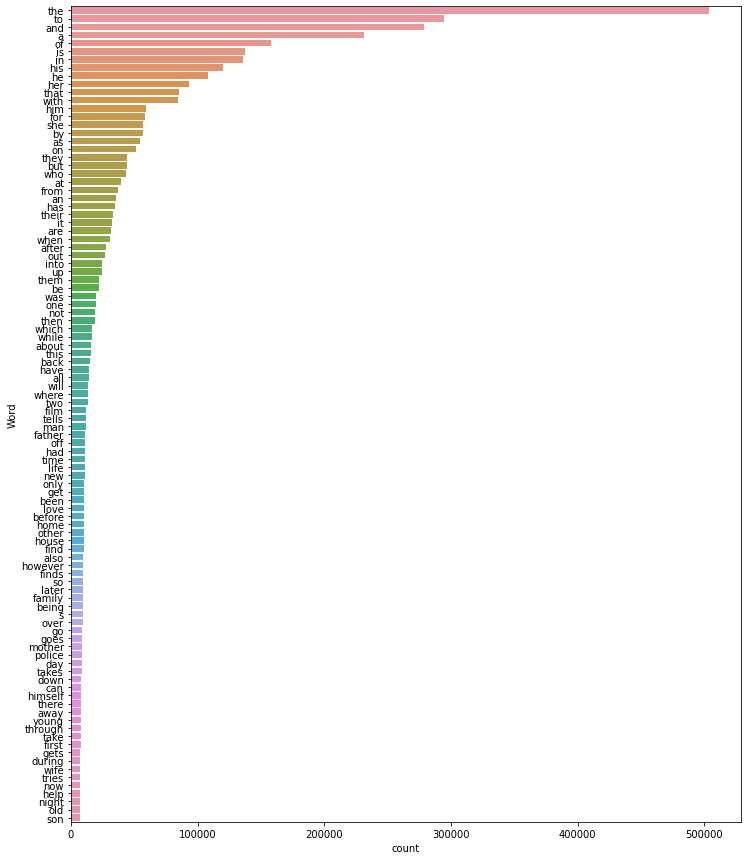

In [147]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(train_df['plot'], 100)

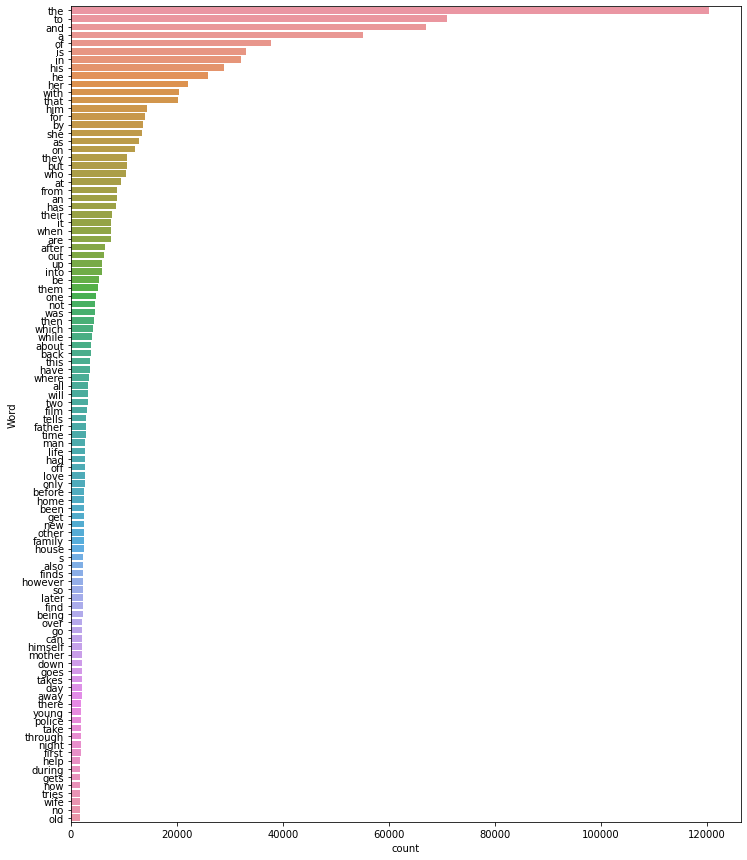

In [148]:
freq_words(test_df['plot'], 100)

In [149]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

train_df['plot'] = train_df['plot'].apply(lambda x: remove_stopwords(x))
test_df['plot'] = test_df['plot'].apply(lambda x: remove_stopwords(x))

train_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,movie_id,movie_name,plot,genre
0,23890098,Taxi Blues,shlykov hard working taxi driver lyosha saxoph...,world cinema drama
1,31186339,The Hunger Games,nation panem consists wealthy capitol twelve p...,action adventure action science fiction drama
2,20663735,Narasimham,poovalli induchoodan sentenced six years priso...,musical action drama
3,2231378,The Lemon Drop Kid,lemon drop kid new york city swindler illegall...,comedy
4,595909,A Cry in the Dark,seventh day adventist church pastor michael ch...,crime fiction world cinema drama
...,...,...,...,...
24995,2632500,Single White Female,allison allie jones software designer new york...,thriller drama
24996,30237779,On the Way Home,family loses daughter sarah car accident frien...,short film
24997,25971350,Blue Valentine,movie starts present clips looks back cindy de...,drama indie romance film romantic drama
24998,34985261,Ki l'ambouba,like every day hallouma leaves home go work sp...,animation


In [150]:
test_df

,movie_id,movie_name,plot,genre
0,33628861,Kan Simittum Neram,film begins man karthik tried kill lakshmi amb...,thriller
1,30413435,A Million,eight people enter reality tv show win billion...,thriller
2,33643382,The Rainbowmaker,datho innocent prison many years comes home no...,romance film
3,3961516,Distant,uzak tells story yusuf young factory worker lo...,world cinema drama
4,155303,Heavy Metal,films title sequence story opens space shuttle...,animation indie science fiction adventure
...,...,...,...,...
6103,29046736,I Don't Want to Be Born,lucy working dancer sleazy strip joint stage a...,horror
6104,30352708,Paju,twenty something eun mo listens taxi driver dr...,romantic drama romance film world cinema drama
6105,2867597,Mr. Bill's Real Life Adventures,attempt bring famed mr bill clay characters li...,comedy
6106,8628195,Kabuliwala,abdur rehman khan middle aged dry fruit seller...,drama


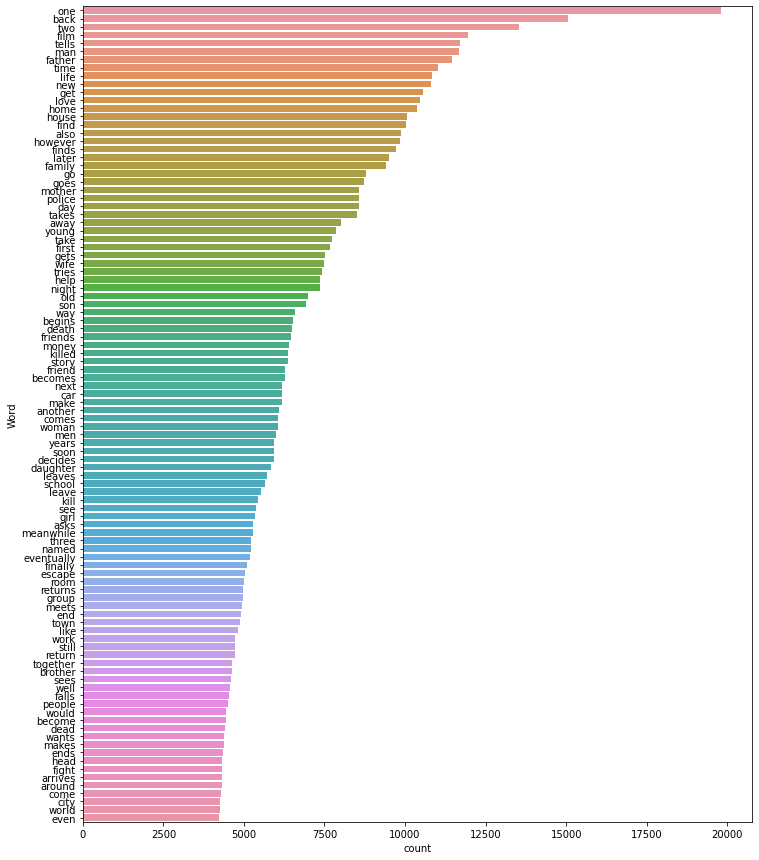

In [151]:
freq_words(train_df['plot'], 100)

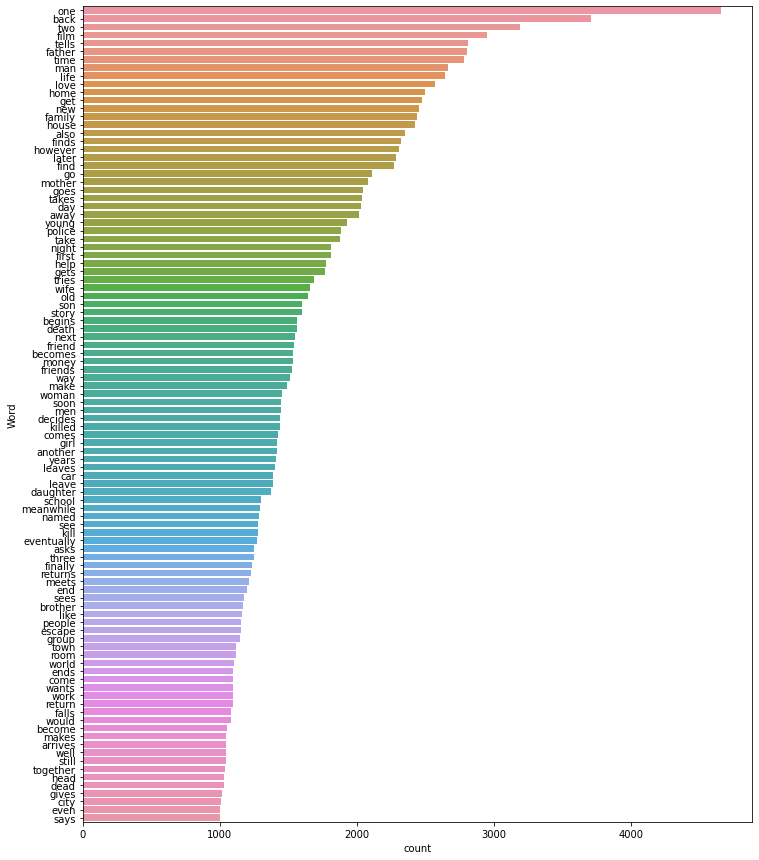

In [152]:
freq_words(test_df['plot'], 100)

In [153]:
train_df = train_df.drop_duplicates(subset={"movie_name","plot"},keep = 'first', inplace = False)

train_df

,movie_id,movie_name,plot,genre
0,23890098,Taxi Blues,shlykov hard working taxi driver lyosha saxoph...,world cinema drama
1,31186339,The Hunger Games,nation panem consists wealthy capitol twelve p...,action adventure action science fiction drama
2,20663735,Narasimham,poovalli induchoodan sentenced six years priso...,musical action drama
3,2231378,The Lemon Drop Kid,lemon drop kid new york city swindler illegall...,comedy
4,595909,A Cry in the Dark,seventh day adventist church pastor michael ch...,crime fiction world cinema drama
...,...,...,...,...
24995,2632500,Single White Female,allison allie jones software designer new york...,thriller drama
24996,30237779,On the Way Home,family loses daughter sarah car accident frien...,short film
24997,25971350,Blue Valentine,movie starts present clips looks back cindy de...,drama indie romance film romantic drama
24998,34985261,Ki l'ambouba,like every day hallouma leaves home go work sp...,animation


In [154]:
train_df = train_df.drop(columns = ["movie_id","movie_name"])
test_df = test_df.drop(columns = ["movie_id","movie_name"])

In [155]:
train_df

,plot,genre
0,shlykov hard working taxi driver lyosha saxoph...,world cinema drama
1,nation panem consists wealthy capitol twelve p...,action adventure action science fiction drama
2,poovalli induchoodan sentenced six years priso...,musical action drama
3,lemon drop kid new york city swindler illegall...,comedy
4,seventh day adventist church pastor michael ch...,crime fiction world cinema drama
...,...,...
24995,allison allie jones software designer new york...,thriller drama
24996,family loses daughter sarah car accident frien...,short film
24997,movie starts present clips looks back cindy de...,drama indie romance film romantic drama
24998,like every day hallouma leaves home go work sp...,animation


In [156]:
test_df

,plot,genre
0,film begins man karthik tried kill lakshmi amb...,thriller
1,eight people enter reality tv show win billion...,thriller
2,datho innocent prison many years comes home no...,romance film
3,uzak tells story yusuf young factory worker lo...,world cinema drama
4,films title sequence story opens space shuttle...,animation indie science fiction adventure
...,...,...
6103,lucy working dancer sleazy strip joint stage a...,horror
6104,twenty something eun mo listens taxi driver dr...,romantic drama romance film world cinema drama
6105,attempt bring famed mr bill clay characters li...,comedy
6106,abdur rehman khan middle aged dry fruit seller...,drama


In [157]:
# binary='true' will give a binary vectorizer

vectorizer_c = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
ml_y = vectorizer_c.fit_transform(train_df['genre'])
ml_y_test = vectorizer_c.fit_transform(test_df['genre'])

In [158]:
vectorizer_t = TfidfVectorizer(max_features = 4500)
ml_x = vectorizer_t.fit_transform(train_df['plot'])
ml_x_test = vectorizer_t.fit_transform(test_df['plot'])

In [159]:
sgd = SGDClassifier(loss='log', alpha=0.00001, penalty='l1')
clf = OneVsRestClassifier(sgd, n_jobs=-1)
clf.fit(ml_x, ml_y)

OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-05, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=1000, n_iter_no_change=5,
                                            n_jobs=None, penalty='l1',
                                            power_t=0.5, random_state=None,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            warm_start=False),
                    n_jobs=-1)

In [160]:
y_pred = clf.predict(ml_x_test)
print("Accuracy: {0:.9%}".format(metrics.accuracy_score(ml_y_test, y_pred)))

Accuracy: 3.356254093%


In [161]:
print("Precision: {0:.9%}".format(precision_score(ml_y_test, y_pred, average='micro')))

Precision: 31.917098446%


In [162]:
recall = recall_score(ml_y_test, y_pred, average='micro')
print("Recall: %.3f" % recall)

Recall: 0.140


In [163]:
f1 = f1_score(ml_y_test, y_pred, average='micro')
print("F1 Score:  {0:.9%}".format(f1))

F1 Score:  19.430133530%


In [164]:
y_pred_prob = clf.predict_proba(ml_x_test)
t = 0.1 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [165]:
f1 = f1_score(ml_y_test, y_pred_new, average='micro')
print("F1 Score:  {0:.9%}".format(f1))

F1 Score:  30.483304565%
